In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### quadretic equation

In [2]:
X=6*np.random.rand(100,1)-3
y=0.5 * X**2 +1.5 *X +2 + np.random.rand(100,1)

Text(0, 0.5, 'Y data set')

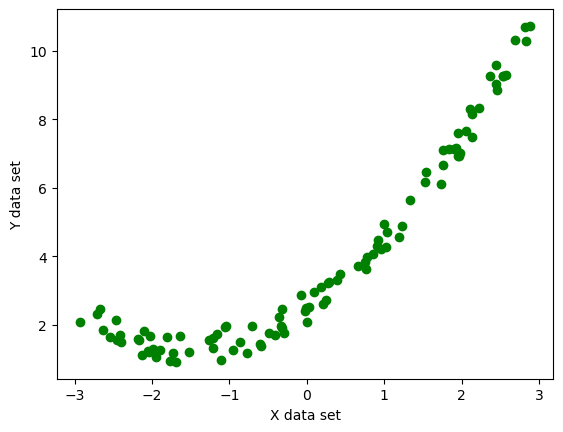

In [5]:
plt.scatter(X,y,color='g')
plt.xlabel('X data set')
plt.ylabel('Y data set')

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

## simple linear regression

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
from sklearn.metrics import r2_score
y_pred=lr.predict(X_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.7594488471325959


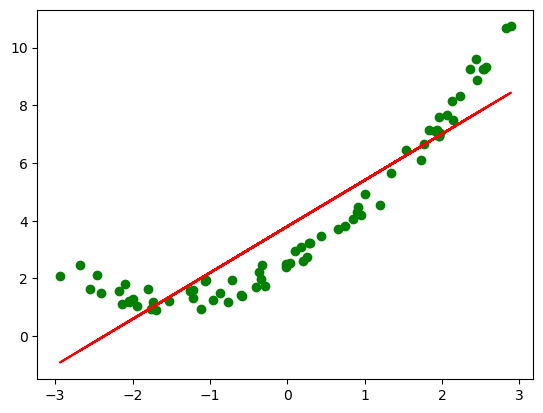

In [10]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.scatter(X_train,y_train,color='g')


## simple polynomial regression with degree=2

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly=PolynomialFeatures(degree=2,include_bias=True) ## here degree changed to 2

In [35]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [36]:
poly_reg=LinearRegression()
poly_reg.fit(X_train_poly,y_train)
y_pred=poly_reg.predict(X_test_poly)

In [37]:
r2=r2_score(y_test,y_pred)
print(r2)

0.9903471254421075


In [38]:
print(poly_reg.coef_)

[[0.         1.51374087 0.47724023]]


In [39]:
print(poly_reg.intercept_)

[2.50004051]


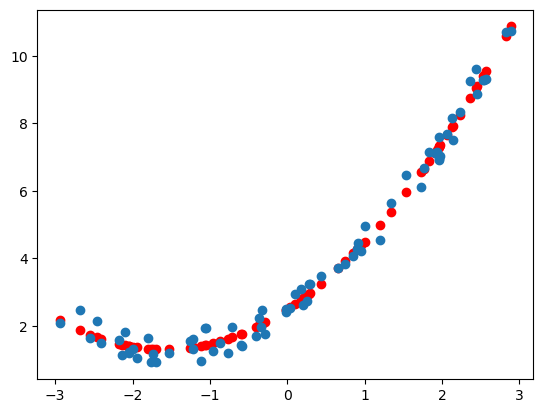

In [40]:
plt.scatter(X_train,poly_reg.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train)


## polynomial regression for degree=3

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly=PolynomialFeatures(degree=3,include_bias=True)

In [53]:
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [54]:
poly_reg=LinearRegression()
poly_reg.fit(X_train_poly,y_train)
y_pred=poly_reg.predict(X_test_poly)

In [55]:
r2=r2_score(y_test,y_pred)
print(r2)

0.9904331821883765


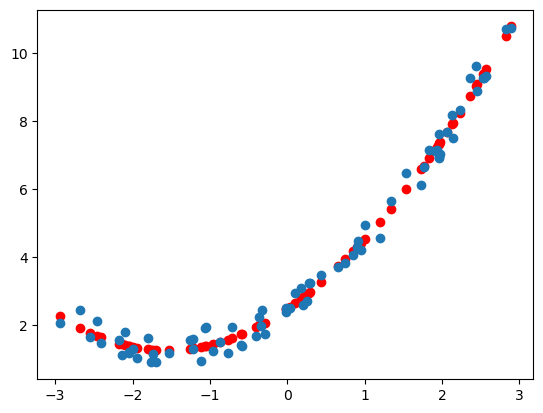

In [56]:
plt.scatter(X_train,poly_reg.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train)


## prediction of new data

In [57]:
X_new=np.linspace(-3,3,200).reshape(200,1)
#poly=PolynomialFeatures(degree=3,include_bias=True)
X_new_poly=poly.transform(X_new) #it take poly from polynomial regression of degree=3

In [58]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

In [59]:
#poly_reg=LinearRegression()
#poly_reg.fit(X_train_poly,y_train)
y_new=poly_reg.predict(X_new_poly)# poly_reg is from polynomia regression of degree=3

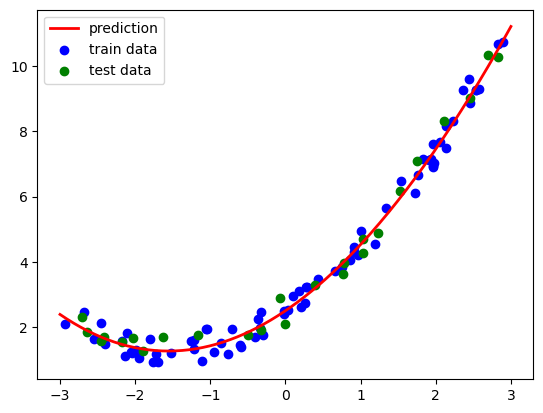

In [62]:
plt.plot(X_new,y_new,'r-',linewidth=2,label="prediction")
plt.scatter(X_train,y_train,color='b',label="train data")
plt.scatter(X_test,y_test,color='g',label="test data")
plt.legend()
plt.show()


## pipeline concept

In [63]:
from sklearn.pipeline import Pipeline

In [67]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)

    plt.plot(X_new,y_pred_new,'r-',label="degree="+str(degree),linewidth=2)
    plt.scatter(X_train,y_train,color='b')
    plt.scatter(X_test,y_test,color='g')
    plt.legend(loc='upper left')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10])
    plt.show()
    

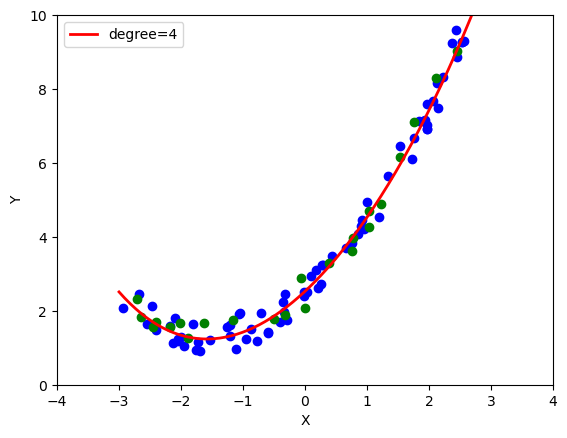

In [76]:
poly_regression(4)